## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [229]:
import numpy as np

def generate_matrix(vec):
    return np.column_stack([vec ** i for i in range(len(vec))])

v = np.arange(1, 6)
generate_matrix(v)

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256],
       [  1,   5,  25, 125, 625]], dtype=int32)

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

Побед у Винни-Пуха - 2361 ; Пятачка - 2636 ; Кролика - 2596 ; Иа-иа - 2407


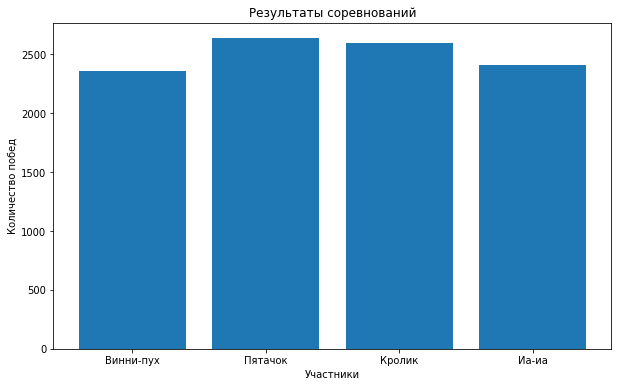

In [48]:
import random
import numpy as np
import matplotlib.pyplot as plt

#-----ЗАДАНИЕ №1-----#

n = 5      #количество км
m = 10000  #количество марафонов

RESULT = np.array([[np.random.exponential(1.0, n), np.random.normal(1, 1, n), 
                  np.random.poisson(1.0, n), np.random.binomial(1, 0.5, n) * 2] for i in range(m)])


#0 - победил Винни-пух, 1 - Пятачок, 2 - Кролик, 3 - Иа-иа
winners_list = list(map(lambda maraphon: np.argmax(sum(maraphon.T)), RESULT))
animals_wins = [winners_list.count(0), winners_list.count(1), winners_list.count(2), winners_list.count(3)]
print("Побед у Винни-Пуха -", animals_wins[0], "; Пятачка -", animals_wins[1], 
      "; Кролика -", animals_wins[2], "; Иа-иа -",  animals_wins[3])



plt.figure(figsize = (10, 6))
plt.bar(["Винни-пух", "Пятачок", "Кролик", "Иа-иа"], animals_wins)
plt.title("Результаты соревнований")
plt.xlabel("Участники")
plt.ylabel("Количество побед")
plt.show()

Побед у Винни-Пуха с Пятачком - 4924 ; побед у Кролика с Иа-иа - 5076


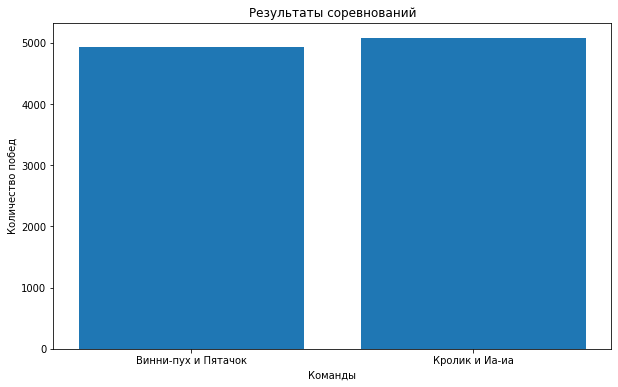

In [230]:
#-----ЗАДАНИЕ №2-----#

n = 5      #количество км
m = 10000  #количество марафонов

RESULT = np.array([[np.random.exponential(1.0, n) + np.random.normal(1, 1, n), 
                  np.random.poisson(1.0, n) + np.random.binomial(1, 0.5, n) * 2] for i in range(m)])

#0 - победили Винни-пух с Пятачком, 1 - победили Кролик и Иа-иа
winners_list = list(map(lambda maraphon: np.argmax(sum(maraphon.T)), RESULT))
animals_wins = [winners_list.count(0), winners_list.count(1)]
print("Побед у Винни-Пуха с Пятачком -", animals_wins[0], "; побед у Кролика с Иа-иа -", animals_wins[1])

plt.figure(figsize = (10, 6))
plt.bar(["Винни-пух и Пятачок", "Кролик и Иа-иа"], animals_wins)
plt.title("Результаты соревнований")
plt.xlabel("Команды")
plt.ylabel("Количество побед")
plt.show()

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [112]:
import requests 
import pandas as pd 


def parse_page(search, page):
    r = requests.get('https://www.avito.ru/moskva?q={}&p={}'.format(search, page)) 
    data = r.text
    data = data.split("itemprop=\"url\"")
    RESULT = []

    for i in data[1::]:
        if i.find("target=\"_blank\"\n title=") > 0:
            #название объявления
            name0 = len("target=\"_blank\"\n title=") + i.index("target=\"_blank\"\n title=")
            name1 = name0 + i[name0::].index(">")
            name = i[name0:name1][1:-1]
        
            #цена
            price0 = i.index("item-price\"\n \n>\n ") + len("item-price\"\n \n>\n ")
            price1 = price0 + i[price0::].index("</span>")
            price = i[price0:price1].strip()

            #ссылка
            link0 = i.index("href=\"/moskva") + len("ihref=") + 1
            link1 = link0 + i[link0:].index("target") - 3
            link = "www.avito.ru/" + i[link0:link1]

            #метро
            if i.find("\"item-address-georeferences-item__content\">") > 0:
                metro0 = i.find("\"item-address-georeferences-item__content\">") + len("\"item-address-georeferences-item__content\">")
                metro1 = metro0 + i[metro0:].find("<")
                metro = i[metro0:metro1]
            else:
                metro = None

            #расстояние
            if i.find("\"item-address-georeferences-item__after\">") > 0:
                distance0 = i.find("\"item-address-georeferences-item__after\">") + len("\"item-address-georeferences-item__after\">")
                distance1 = distance0 + i[distance0:].find("<")
                distance = i[distance0:distance1]
            else:
                distance = None

            RESULT.append([name, price, link, metro, distance])
 
    result_df = pd.DataFrame(RESULT)
    result_df.columns = ["Объявление", "Цена", "Ссылка", "Метро", "Расстояние"]
    return result_df


df = parse_page('жестий диск', 3)
df

,Объявление,Цена,Ссылка,Метро,Расстояние
0,"2TB новые внешние 2.5"" диски Seagate Expansion...",4 550 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/2tb...,Площадь Гагарина,600 м
1,Продам SSD m2 SATA 256 GB с битым смартом в Мо...,1 500 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/pro...,Петровский парк,500 м
2,Western Digital WD Ultrastar DC HA210 2TB в Мо...,4 000 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/wes...,Люблино,100 м
3,Жесткий диск в Москве,149 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/zhe...,Окружная,300 м
4,Жесткий диск в Москве,1 600 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/zhe...,None,None
5,Ноутбук HP 14 в Москве,6 500 ₽,www.avito.ru/moskva/noutbuki/noutbuk_hp_14_189...,Алексеевская,100 м
6,Жесткий диск в Москве,500 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/zhe...,Семеновская,None
7,Игровой ноутбук Asus i5/Geforce 840M/ - гарант...,21 900 ₽,www.avito.ru/moskva/noutbuki/igrovoy_noutbuk_a...,Павелецкая,300 м
8,Игровой компьютер в Москве,18 000 ₽,www.avito.ru/moskva/nastolnye_kompyutery/igrov...,Фрунзенская,600 м
9,Сервер HP Apollo 4200 G9 28LFF 2x E5-2643v3 51...,257 606 ₽,www.avito.ru/moskva/tovary_dlya_kompyutera/ser...,Калужская,700 м


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

#----- ЗАДАНИЕ 1 -----#

#Типы: Store, Dept, Size - int (целое число)
#Date - дата
#Weekly_Sales, Temperature, Fuel_Price, MarkDown1-5, CPI, Unemployment - float (нецелое число)
#IsHoliday - bool (логическая переменная)
#Type - str (тип магазина в виде буквы)

wal_df = pd.read_csv("walmart.csv")
wal_df["Date"] = list(map(lambda x: dt.date(int(x[0:4]), int(x[5:7]), int(x[8:])), wal_df["Date"]))
wal_df

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [116]:
#----- ЗАДАНИЕ 2 -----#

nulls = wal_df.isnull().sum() / len(wal_df) * 100
print(nulls)

for col in wal_df.columns:
    if nulls[col] >= 60.0:  #удаление переменные где больше 60% пропусков
        wal_df = wal_df.drop(col, 1)
        
wal_df

Store            0.000000
Date             0.000000
Dept             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Type             0.000000
Size             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.736909
MarkDown2       74.143014
MarkDown3       67.825095
MarkDown4       68.363782
MarkDown5       64.570019
CPI              0.000000
Unemployment     0.000000
dtype: float64


,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,192.327265,8.667


In [121]:
#----- ЗАДАНИЕ 3 -----#

print("Количество магазинов в выборке -", len(wal_df["Store"].value_counts()))
print("Количество отделов в выборке -", len(wal_df["Dept"].value_counts()))
print("Период времени с", min(wal_df["Date"]), "по", max(wal_df["Date"]))

Количество магазинов в выборке - 45
Количество отделов в выборке - 81
Период времени с 2010-02-05 по 2012-10-19


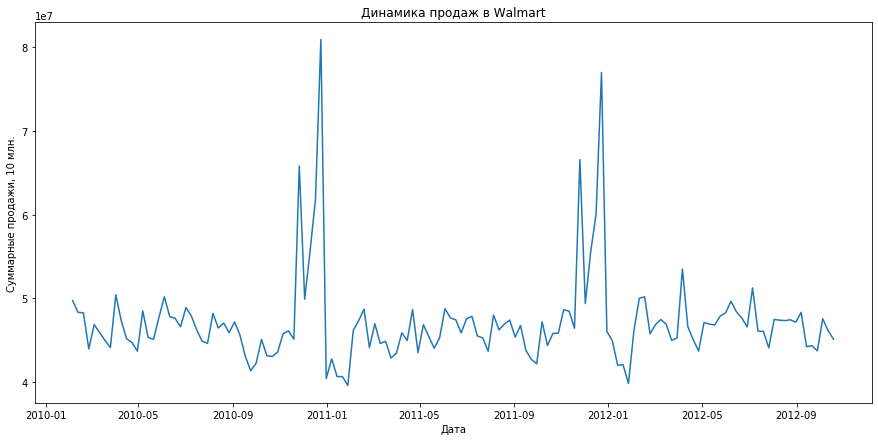

In [252]:
#----- ЗАДАНИЕ 4 -----#

plt.figure(figsize = (15, 7))
plt.title("Динамика продаж в Walmart")
plt.xlabel("Дата")
plt.ylabel("Суммарные продажи, 10 млн.")
plt.plot(wal_df.groupby("Date")["Weekly_Sales"].sum())
plt.show()

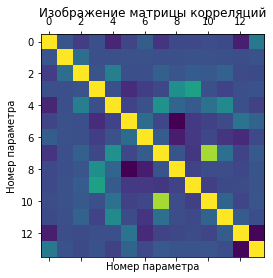

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,1.000000,0.024170,-0.085175,-0.000574,-0.182654,-0.049933,0.064666,-0.120050,-0.034656,-0.031456,-0.009745,-0.025606,-0.211129,0.208524
Dept,0.024170,1.000000,0.148345,0.000887,-0.003026,0.004509,0.003417,-0.002298,0.000218,0.001680,0.004441,-0.000061,-0.007544,0.007992
Weekly_Sales,-0.085175,0.148345,1.000000,0.012770,0.243733,-0.002197,0.000385,0.084252,0.023656,0.060954,0.045239,0.090141,-0.020791,-0.026114
IsHoliday,-0.000574,0.000887,0.012770,1.000000,0.000582,-0.156170,-0.076830,-0.037376,0.332910,0.427831,-0.002885,-0.056627,-0.001718,0.009433
Size,-0.182654,-0.003026,0.243733,0.000582,1.000000,-0.057979,0.003803,0.344724,0.108795,0.049239,0.169616,0.305098,-0.003249,-0.068803
Temperature,-0.049933,0.004509,-0.002197,-0.156170,-0.057979,1.000000,0.144837,-0.039944,-0.324420,-0.097052,-0.064348,-0.017437,0.181292,0.097301
Fuel_Price,0.064666,0.003417,0.000385,-0.076830,0.003803,0.144837,1.000000,0.061825,-0.219412,-0.101990,-0.042617,-0.124587,-0.163226,-0.032461
MarkDown1,-0.120050,-0.002298,0.084252,-0.037376,0.344724,-0.039944,0.061825,1.000000,0.021313,-0.109126,0.819762,0.157623,-0.054473,0.047050
MarkDown2,-0.034656,0.000218,0.023656,0.332910,0.108795,-0.324420,-0.219412,0.021313,1.000000,-0.051470,-0.011466,-0.012017,-0.039858,0.018587
MarkDown3,-0.031456,0.001680,0.060954,0.427831,0.049239,-0.097052,-0.101990,-0.109126,-0.051470,1.000000,-0.072174,-0.027634,-0.023690,0.012364


In [232]:
#----- ЗАДАНИЕ 5 -----#

corr_matrix = wal_df.corr()
plt.matshow(corr_matrix)
plt.title("Изображение матрицы корреляций")
plt.xlabel("Номер параметра")
plt.ylabel("Номер параметра")
plt.show() #нарисованная матрица корреляции

wal_df.corr() #матрица корреляции

Топ 5 магазинов по суммарным продажам за все время: магазины c номерами 20, 4, 14, 13, 2


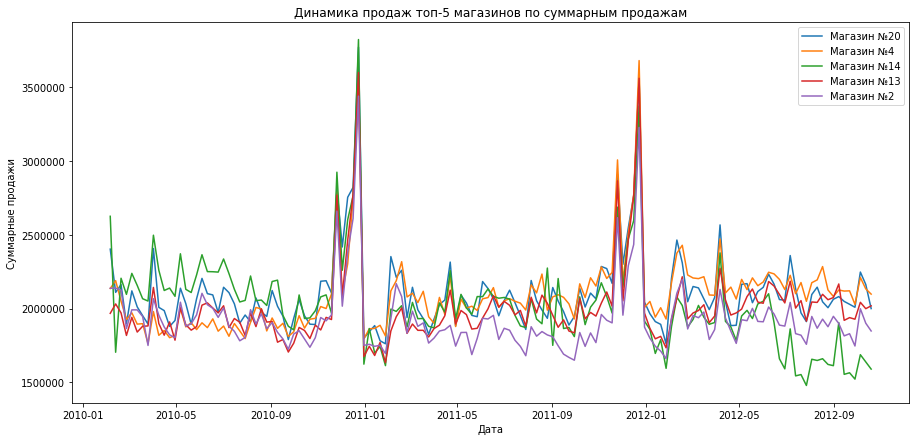

In [255]:
#----- ЗАДАНИЕ 6 -----#

top5 = wal_df.groupby("Store")["Weekly_Sales"].sum().sort_values()[::-1].keys()[:5]
print("Топ 5 магазинов по суммарным продажам за все время: магазины c номерами", end = ' ')
print(*top5, sep = ', ')

plt.figure(figsize = (15, 7))

for store in top5:  #цикл для отрисовки
    plt.plot(wal_df.loc[wal_df["Store"] == store].groupby("Date")["Weekly_Sales"].sum(), label = "Магазин №{}".format(store))
    
plt.title("Динамика продаж топ-5 магазинов по суммарным продажам")
plt.xlabel("Дата")
plt.ylabel("Суммарные продажи")
plt.legend()
plt.show()

Топ 10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А: отделы c номерами 92, 95, 90, 38, 72, 91, 40, 2, 94, 93


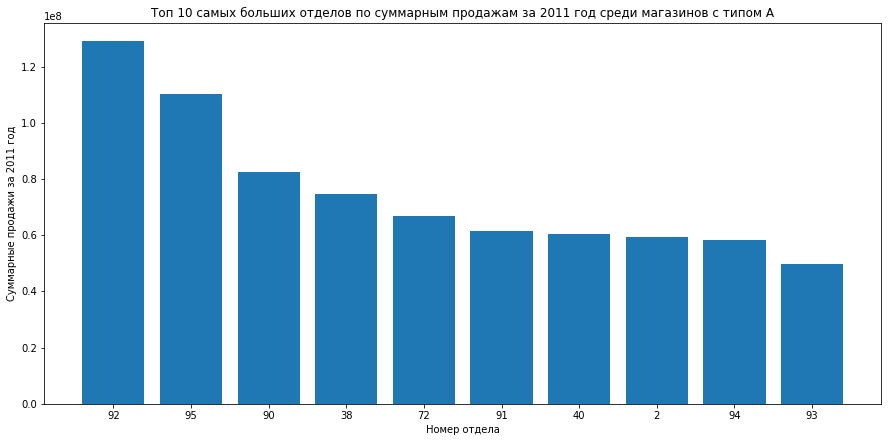

In [301]:
#----- ЗАДАНИЕ 7 -----#

top10 = wal_df.loc[wal_df["Type"] == 'A'].loc[wal_df["Date"].map(lambda x: x.year == 2011)].groupby("Dept")["Weekly_Sales"].sum().sort_values()[::-1][:10]
print("Топ 10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А: отделы c номерами", end = ' ')
print(*top10.keys(), sep = ', ')

plt.figure(figsize = (15, 7))
plt.bar(list(map(str, top10.keys())), list(top10.values))
plt.title("Топ 10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А")
plt.xlabel("Номер отдела")
plt.ylabel("Суммарные продажи за 2011 год")
plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [328]:
import vk
import random
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep


def download_users_bdates(group_id, access_token, N):
    #функция, которая скачивает id подписчиков сообщества и их даты рождения
    #group_id - id/короткое имя сообщества
    #access_token - токен для доступа
    #N - количество id, которое требуется скачать
    
    users_dict = {}
    
    for i in range(N // 1000):
        users_group = api.groups.getMembers(group_id = group_id,  access_token = token, count = 1000, offset = 1000 * i)
        user_ids = users_group['items']

        users_info = api.users.get(user_ids = user_ids, access_token = token, fields = 'bdate')
    
        for user in users_info:
            if 'bdate' in user:
                tmp = user['bdate'].split('.')
                try:
                    if len(tmp) == 3:
                        users_dict[user['id']] = dt.date(2020, int(tmp[1]), int(tmp[0])) #Так как год рождения не важен,
                    else:                                                                #везде ставится год рождения 2020
                        users_dict[user['id']] = dt.date(2020, int(tmp[1]), int(tmp[0]))
                except:
                    pass
                
    return users_dict #фукнция возвращает словарь с элементами формата id : дата рождения


token = "здесь должен быть токен" #токен доступа
group_id = "vk.fact" #сообщество "Знаете ли Вы?" 5.4 миллиона подписчиков


session = vk.Session()
api = vk.API(session, v = 5.103) 

USERS_DICT = download_users_bdates(group_id, token, 30000)

df = pd.DataFrame(USERS_DICT, index = [0]).transpose()
df.columns = ["Дата рождения"]
df

,Дата рождения
19,2020-12-12
27,2020-01-09
88,2020-01-19
134,2020-08-20
150,2020-04-24
...,...
989125,2020-12-03
989141,2020-12-06
989408,2020-07-22
989556,2020-04-12


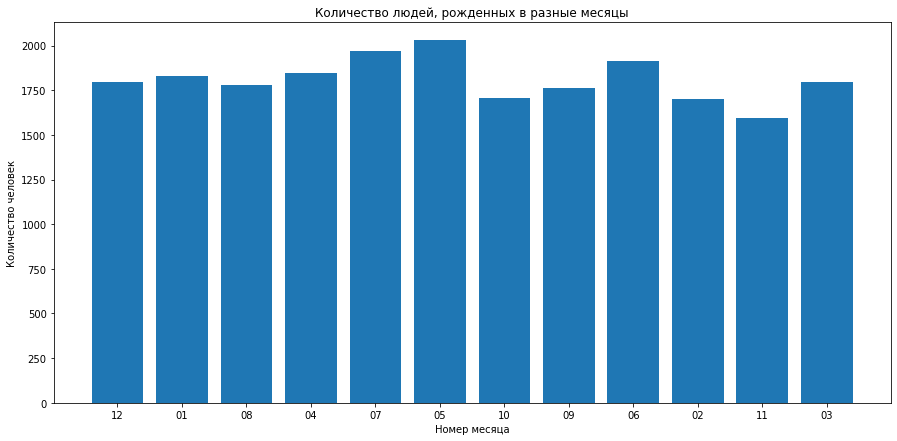

In [329]:
USERS_BMONTH_COUNT = {}
for key in USERS_DICT.keys():
    if USERS_DICT[key].strftime('%m') in USERS_BMONTH_COUNT:
        USERS_BMONTH_COUNT[USERS_DICT[key].strftime('%m')] += 1
    else:
        USERS_BMONTH_COUNT[USERS_DICT[key].strftime('%m')] = 0
        
plt.figure(figsize = (15, 7))
plt.bar(list(USERS_BMONTH_COUNT.keys()), list(USERS_BMONTH_COUNT.values()))
plt.title("Количество людей, рожденных в разные месяцы")
plt.xlabel("Номер месяца")
plt.ylabel("Количество человек")
plt.show()

# Как видно, количество людей, рожденных в разные месяцы примерно одинаковое.
# Больше людей рождается в месяцы с большим количеством дней.

In [331]:
simul_count = 10000 #количество симуляций
c = 0

for i in range(simul_count):
    simul_keys = random.sample(list(USERS_DICT.keys()), 50)
    simul_values = [USERS_DICT[k] for k in simul_keys]
    
    for elem in simul_values:
        if simul_values.count(elem) > 1:
            c += 1
            break
            
print("Эпирическая вероятность:", c / simul_count, "~ 0.97")

Эпирическая вероятность: 0.9701 ~ 0.97
